20
[[0. 2.]
 [1. 2.]
 [2. 2.]
 [2. 3.]
 [2. 4.]
 [2. 5.]
 [3. 5.]
 [4. 5.]
 [5. 5.]
 [6. 5.]
 [6. 4.]
 [6. 3.]
 [5. 3.]
 [4. 3.]
 [3. 3.]
 [2. 3.]
 [1. 3.]
 [1. 2.]
 [2. 2.]
 [3. 2.]]
[[4. 5.]
 [3. 2.]
 [2. 6.]
 [7. 5.]
 [6. 2.]
 [0. 3.]
 [1. 1.]
 [4. 2.]]
[3, 2]
[[1.    1.    2.    2.    1.    1.    1.    1.   ]
 [1.    1.    0.001 0.001 0.    0.    0.    1.   ]
 [1.    0.    0.001 0.001 0.001 0.001 1.    1.   ]
 [1.    0.    0.001 0.001 0.001 0.001 0.001 3.   ]
 [1.    0.    1.    0.001 0.    1.    0.    3.   ]
 [1.    0.    0.    0.001 0.    0.001 0.    1.   ]
 [1.    0.    1.    0.001 0.001 0.001 0.    1.   ]
 [1.    1.    1.    1.    1.    1.    1.    1.   ]]


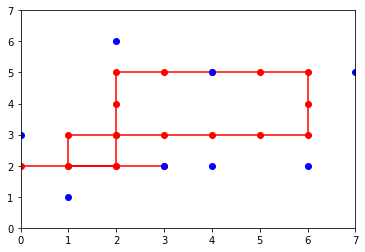

In [8]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import icecave_functions as ice
from random import *

from numpy.core.records import array
from numpy.lib.stride_tricks import _broadcast_to_dispatcher
#import pygame as pg


######################################################################
########################### Set-ups ##################################


width = 6
length = 6

startpoint = np.array([[0, 2], [0, 3]]) # same as (1, 3), (1, 4)
endpoint = np.array([[3, 7], [4, 7]]) # same as (4, 8), (5, 8)

initial_rocks = np.array([[4, 5]]) # same as (5, 6)
odds_of_rocks = 0.1 # 10% odds of rocks


#######################################################################
#######################################################################


# Plot setups
maps = np.zeros((length + 2, width + 2))

## set rocks
maps[:, 0] = 1
maps[:, width + 1] = 1
maps[length + 1, :] = 1
maps[0, :] = 1
    

## randomly set startpoint
startpoint_save = startpoint
startpoint = startpoint[randint(1, startpoint.shape[0]) - 1]

## check if the start / end move is vertical / horizontal
if startpoint[0] == 0 or startpoint[0] == width + 1:
    vertical_s = 1
    horizontal_s = 0    
else:
    vertical_s = 0
    horizontal_s = 1
    
if endpoint[0][0] == 0 or endpoint[0][0] == length + 1:
    vertical_e = 1
    horizontal_e = 0    
else:
    vertical_e = 0
    horizontal_e = 1


## set initial setups
keep = 1

row = startpoint[0]
column = startpoint[1]

horizontal = horizontal_s
vertical = vertical_s

now = startpoint

### path set
path = np.zeros([(length + 2) * (width + 2), 2])
num_path = 0

### rock set
rocks = np.zeros([(length + 2) * (width + 2), 2])
num_rocks = 0
for i in range(0, initial_rocks.shape[0]):
    rocks[i] = initial_rocks[i]
    num_rocks = num_rocks + 1

#######################################################################
#######################################################################

joints = 0
while keep == 1:
    
    #find stuckpoint
    maps = ice.imstuck(maps)

    #update now_latest
    now_latest = now
    
    #decide next tile
    now, maps, horizontal, rock_now = ice.nextile(now, maps, horizontal)
    
    #update maps, path, rocks
    maps, path, rocks, num_path, num_rocks = ice.writemap(maps, now, path, rocks, rock_now, num_path, num_rocks, horizontal, now_latest)

    #swap
    horizontal, vertical = vertical, horizontal
    
    if joints > 4:
        #check if the path can end
        keep, maps, path = ice.endcheck(keep, maps, path, now, endpoint, horizontal, horizontal_e)
    
    joints = joints + 1

#######################################################################
#######################################################################
# redraw maps

maps = ice.imnotstuck(maps)

rocks = rocks[0 : num_rocks, :]
path = path[0 : num_path, :]

path, num_path = ice.redraw(path, num_path)

## set startpoint as 2, endpoint as 3

for i in range(0, initial_rocks.shape[0]):
    maps[initial_rocks[i][0], initial_rocks[i][1]] = 1
    
for i in range(0, startpoint.shape[0]):
    maps[startpoint_save[i][0], startpoint_save[i][1]] = 2
    
for i in range(0, endpoint.shape[0]):
    maps[endpoint[i][0], endpoint[i][1]] = 3
    
#######################################################################
#######################################################################
# plot


print(num_path)
print(path)
print(rocks)
print(now)

 
with np.printoptions(precision=3, suppress=True):
    print(maps)
    
plt.plot(path[:, 0], path[:, 1], 'ro-')
plt.axis([0, length + 1, 0, width + 1])

plt.plot(rocks[:, 0], rocks[:, 1], 'bo')
plt.show()

In [3]:
import numpy as np
maps = np.array([[1, 1, 1, 1, 1], [1, 0, 0, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 1, 1]])
print(maps)


for i in range(maps.shape[0]):
    for j in range(maps.shape[1]):
        if maps[i, j] != 1:
            if maps[i, j + 1] == 1 and maps[i, j - 1] == 1:
                maps[i, j] = 10
            elif maps[i + 1, j] == 1 and maps[i - 1, j] == 1:
                maps[i, j] = 10
                
print(maps)

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 1 0 0 1]
 [1 1 1 1 1]]
[[ 1  1  1  1  1]
 [ 1 10  0  0  1]
 [ 1  1  0  0  1]
 [ 1  1  1  1  1]]


In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import icecave_functions as ice
from random import *

from numpy.core.records import array
from numpy.lib.stride_tricks import _broadcast_to_dispatcher
#import pygame as pg


######################################################################
########################### Set-ups ##################################


width = 6
length = 6

startpoint = np.array([[0, 2], [0, 3]]) # same as (1, 3), (1, 4)
endpoint = np.array([[3, 7], [4, 7]]) # same as (4, 8), (5, 8)

initial_rocks = np.array([[4, 5]]) # same as (5, 6)
odds_of_rocks = 0.1 # 10% odds of rocks


#######################################################################
#######################################################################


# Plot setups
maps = np.zeros((length + 2, width + 2))

## set rocks
maps[:, 0] = 1
maps[:, width + 1] = 1
maps[length + 1, :] = 1
maps[0, :] = 1
    

## randomly set startpoint
startpoint_save = startpoint
startpoint = startpoint[randint(1, startpoint.shape[0]) - 1]

## check if the start / end move is vertical / horizontal
if startpoint[0] == 0 or startpoint[0] == width + 1:
    vertical_s = 1
    horizontal_s = 0    
else:
    vertical_s = 0
    horizontal_s = 1
    
if endpoint[0][0] == 0 or endpoint[0][0] == length + 1:
    vertical_e = 1
    horizontal_e = 0    
else:
    vertical_e = 0
    horizontal_e = 1


## set initial setups
keep = 1

row = startpoint[0]
column = startpoint[1]

horizontal = horizontal_s
vertical = vertical_s

now = startpoint

### path set
path = np.zeros([(length + 2) * (width + 2), 2])
num_path = 0

### rock set
rocks = np.zeros([(length + 2) * (width + 2), 2])
num_rocks = 0
for i in range(0, initial_rocks.shape[0]):
    rocks[i] = initial_rocks[i]
    num_rocks = num_rocks + 1

#######################################################################
#######################################################################

while keep == 1:
    
    #find stuckpoint
    maps = ice.imstuck(maps)

    #update now_latest
    now_latest = now
    
    #decide next tile
    now, maps, horizontal, rock_now = ice.nextile(now, maps, horizontal)
    
    #update maps, path, rocks
    maps, path, rocks, num_path, num_rocks = ice.writemap(maps, now, path, rocks, rock_now, num_path, num_rocks, horizontal, now_latest)

    #swap
    horizontal, vertical = vertical, horizontal

    #check if the path can end
    keep, maps, path = ice.endcheck(keep, maps, path, now, endpoint, horizontal, horizontal_e)
    


maps = ice.imnotstuck(maps)

rocks = rocks[0 : num_rocks, :]
path = path[0 : num_path, :]

path, num_path = ice.redraw(path, num_path)

#######################################################################
#######################################################################
# redraw maps

## set startpoint as 2, endpoint as 3

for i in range(0, initial_rocks.shape[0]):
    maps[initial_rocks[i][0], initial_rocks[i][1]] = 1
    
for i in range(0, startpoint.shape[0]):
    maps[startpoint_save[i][0], startpoint_save[i][1]] = 2
    
for i in range(0, endpoint.shape[0]):
    maps[endpoint[i][0], endpoint[i][1]] = 3
    
#######################################################################
#######################################################################
# plot


print(num_path)
print(path)
print(rocks)
print(now)

 
with np.printoptions(precision=3, suppress=True):
    print(maps)
    
plt.plot(path[:, 0], path[:, 1], 'ro-')
plt.axis([0, length + 1, 0, width + 1])

plt.plot(rocks[:, 0], rocks[:, 1], 'bo')
plt.show()